# Submission Dicoding
## Requirement Library Tf with the dataset that has been prepared
### Andi Alvin - 1494037162101-346



In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
#unzip
import zipfile
local_zip = '/content/drive/MyDrive/Colab Notebooks/dicoding/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/dicoding')
zip_ref.close()

In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio("/content/drive/MyDrive/Colab Notebooks/dicoding/rockpaperscissors", output="/content/drive/MyDrive/Colab Notebooks/dicoding/splitrps",
   seed=1337, ratio=(.6, .4), group_prefix=None, move=False)

In [9]:
# membuat nama directori
base_dir = '/content/drive/MyDrive/Colab Notebooks/dicoding/splitrps'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')



In [ ]:
# memecah direktori rock menjadi data train dan data validation
#train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.25)

# memecah direktori paper menjadi data train dan data validation
#train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.25)

# memecah direktori scissors menjadi data train dan data validation
#train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.25)

In [10]:
# ini data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
# bikin model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)


Epoch 1/20
10/10 - 21s - loss: 1.1490 - accuracy: 0.3800 - val_loss: 1.0730 - val_accuracy: 0.3733 - 21s/epoch - 2s/step
Epoch 2/20
10/10 - 19s - loss: 1.0572 - accuracy: 0.4315 - val_loss: 0.8575 - val_accuracy: 0.6533 - 19s/epoch - 2s/step
Epoch 3/20
10/10 - 19s - loss: 0.7851 - accuracy: 0.6833 - val_loss: 0.6528 - val_accuracy: 0.7467 - 19s/epoch - 2s/step
Epoch 4/20
10/10 - 24s - loss: 0.6135 - accuracy: 0.7933 - val_loss: 0.5665 - val_accuracy: 0.8267 - 24s/epoch - 2s/step
Epoch 5/20
10/10 - 19s - loss: 0.4820 - accuracy: 0.8400 - val_loss: 0.3248 - val_accuracy: 0.8600 - 19s/epoch - 2s/step
Epoch 6/20
10/10 - 18s - loss: 0.4785 - accuracy: 0.8116 - val_loss: 0.5026 - val_accuracy: 0.8200 - 18s/epoch - 2s/step
Epoch 7/20
10/10 - 19s - loss: 0.3933 - accuracy: 0.8467 - val_loss: 0.4523 - val_accuracy: 0.8200 - 19s/epoch - 2s/step
Epoch 8/20
10/10 - 23s - loss: 0.2756 - accuracy: 0.8933 - val_loss: 0.4155 - val_accuracy: 0.8867 - 23s/epoch - 2s/step
Epoch 9/20
10/10 - 19s - loss: 0

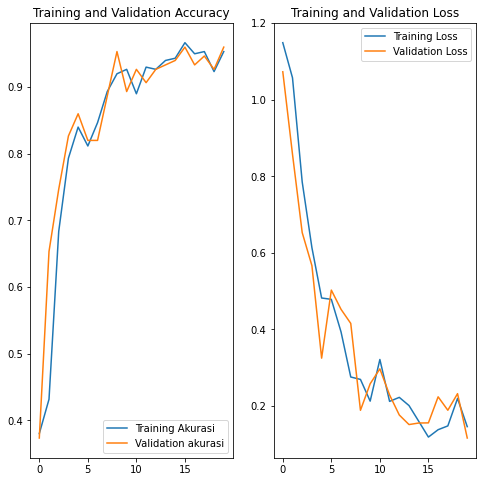

In [20]:
# visual hasil

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Akurasi')
plt.plot(epochs_range, val_acc, label='Validation akurasi')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving d9N9D5ldS6PCfFXu.png to d9N9D5ldS6PCfFXu.png
1/1 [==============================] - 0s 129ms/step
d9N9D5ldS6PCfFXu.png
scissors


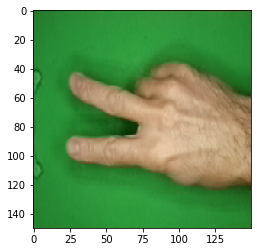

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')